In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Google Driveのパスを指定
drive_path = '/content/drive/My Drive/'

# "GoogleNews-vectors-negative300.bin.gz" を検索
file_name = 'GoogleNews-vectors-negative300 .bin.gz'

# ファイルが存在するか確認
for root, dirs, files in os.walk(drive_path):
    if file_name in files:
        print(f"{os.path.join(root, file_name)}")

In [5]:
#70
import numpy as np
import pandas as pd
import gensim

# Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル
file_path = '/content/drive/My Drive/100本ノック/GoogleNews-vectors-negative300 .bin.gz'

# Word2Vecモデルをバイナリ形式で読み込む
model = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)

# ファイルパスを設定
train_path = '/content/drive/My Drive/100本ノック/train.txt'
valid_path = '/content/drive/My Drive/100本ノック/valid.txt'
test_path = '/content/drive/My Drive/100本ノック/test.txt'

# 平均単語ベクトルの計算
def calculate_mean_vector(text, model, dim=300):
    words = text.split()
    valid_vectors = [model[word] for word in words if word in model]
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(dim)

# 特徴ベクトルとラベルベクトルの作成
def create_features_and_labels(file_path, model, category_mapping, dim=300):
    df = pd.read_csv(file_path, sep="\t", header=None, names=["TITLE", "CATEGORY"])
    X = np.array([calculate_mean_vector(title, model, dim) for title in df["TITLE"]])
    y = np.array([category_mapping[category] for category in df["CATEGORY"]])
    # 中身の確認
    print(f"\n--- {file_path} ---")
    print(f"Xの形状: {X.shape}")
    print(f"yの形状: {y.shape}")
    print("Xの一部:\n", X[:5])  # 最初の5件のベクトル
    print("yの一部:\n", y[:5])  # 最初の5件のラベル
    return X, y

# カテゴリを数値に変換
category_mapping = {"b": 0, "t": 1, "e": 2, "m": 3}

# データセットごとに特徴ベクトルとラベルベクトルを作成

X_train, Y_train = create_features_and_labels(train_path, model, category_mapping)
X_valid, Y_valid = create_features_and_labels(valid_path, model, category_mapping)
X_test, Y_test = create_features_and_labels(test_path, model, category_mapping)

# データを保存
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_valid.npy", X_valid)
np.save("Y_valid.npy", Y_valid)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)



--- /content/drive/My Drive/100本ノック/train.txt ---
Xの形状: (10672, 300)
yの形状: (10672,)
Xの一部:
 [[-0.01702881  0.00571987 -0.00460379 ...  0.0672869   0.05203683
  -0.10175432]
 [ 0.11865234  0.12989502 -0.06731872 ... -0.0404541   0.06668091
   0.0744339 ]
 [ 0.03770142  0.04026184  0.0144165  ... -0.05880127  0.02980957
   0.08000489]
 [ 0.0557251   0.02410278  0.05004578 ...  0.06296387  0.10586548
  -0.0803772 ]
 [ 0.06005859  0.08336046 -0.05382623 ...  0.03038194 -0.08108182
  -0.0612793 ]]
yの一部:
 [0 0 3 0 2]

--- /content/drive/My Drive/100本ノック/valid.txt ---
Xの形状: (1334, 300)
yの形状: (1334,)
Xの一部:
 [[ 0.10009766  0.01088867  0.05687866 ...  0.08238526  0.19003907
   0.03999024]
 [-0.02045441  0.03782654  0.00518036 ...  0.03439331  0.00679016
   0.06770325]
 [ 0.10134888  0.08273697 -0.02801895 ... -0.07185364  0.08414459
  -0.02786255]
 [-0.06111654  0.08628336  0.0355428  ... -0.00345866  0.01580811
  -0.00964355]
 [-0.04746246 -0.13601685  0.00904465 ...  0.08390808  0.08162832
  -

In [7]:
#71
import numpy as np


# ソフトマックス関数の定義
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # オーバーフロー対策
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# 定数の設定
d = X_train.shape[1]  # 特徴ベクトルの次元数 (300)
L = 4                 # カテゴリ数

# 重み行列Wをランダムに初期化
np.random.seed(1234)
W = np.random.randn(d, L)

# x1に対する計算
x1 = X_train[0]  # x1を取得
y1_pred = softmax(np.dot(x1, W))  # y^1 = softmax(x1W)

# X[1:4]に対する計算
X_subset = X_train[:4]  # X[1:4]を取得
Y_hat = softmax(np.dot(X_subset, W))  # Y^ = softmax(X[1:4]W)

# 結果を出力
print("y^1 の計算結果:")
print(y1_pred)
print("\nY^ の計算結果:")
print(Y_hat)


y^1 の計算結果:
[0.69354761 0.01750725 0.07130413 0.217641  ]

Y^ の計算結果:
[[0.69354761 0.01750725 0.07130413 0.217641  ]
 [0.02892506 0.00178683 0.85803402 0.1112541 ]
 [0.18222951 0.21517422 0.3254258  0.27717047]
 [0.47440156 0.20934289 0.10428869 0.21196685]]


In [8]:
#72
# クロスエントロピー損失の計算
def cross_entropy_loss(Y_true, Y_pred):
    # Y_trueは1次元のラベル（事例数の長さ）、Y_predは2次元の予測確率
    if len(Y_true.shape) == 1:  # Y_trueが1次元の場合
        return -np.log(Y_pred[np.arange(len(Y_true)), Y_true] + 1e-15).mean()
    else:
        return -np.sum(Y_true * np.log(Y_pred)) / Y_true.shape[0]

# 勾配の計算
def compute_gradients(X, Y_true, Y_pred):
    grad = Y_pred
    grad[np.arange(len(Y_true)), Y_true] -= 1  # 正解ラベルの位置で1を引く
    grad /= len(Y_true)  # 損失の平均を取る
    return np.dot(X.T, grad)

# 事例x1に対する計算
x1 = X_train[0]  # x1を取得
y1 = Y_train[0]  # y1を取得
y1_pred = softmax(np.dot(x1, W).reshape(1, -1))  # x1に対する予測確率
loss_x1 = cross_entropy_loss(np.array([y1]), y1_pred)  # x1のクロスエントロピー損失

# 事例集合X[1:4]に対する計算
X_subset = X_train[:4]  # X[1:4]を取得
Y_subset = Y_train[:4]  # Y[1:4]のラベルを取得
Y_pred = softmax(np.dot(X_subset, W))  # X[1:4]に対する予測確率
loss_subset = cross_entropy_loss(Y_subset, Y_pred)  # 事例集合のクロスエントロピー損失

# 勾配の計算
grad_W = compute_gradients(X_subset, Y_subset, Y_pred)

# 結果を出力
print("x1に対するクロスエントロピー損失:", loss_x1)
print("事例集合X[1:4]に対するクロスエントロピー損失:", loss_subset)
print("\nWに対する勾配:")
print(grad_W)



x1に対するクロスエントロピー損失: 0.3659353828117856
事例集合X[1:4]に対するクロスエントロピー損失: 1.4844515182734175

Wに対する勾配:
[[-0.03310513  0.00492298  0.02966851 -0.00148636]
 [-0.03330554  0.00351032  0.03186952 -0.00207431]
 [ 0.01077637  0.00334448 -0.01204483 -0.00207602]
 ...
 [-0.00628633  0.00040856 -0.01062055  0.01649831]
 [-0.03272738  0.00740165  0.02041658  0.00490915]
 [ 0.00393184 -0.00031496  0.01856613 -0.02218301]]


In [9]:
#73
# 学習率（step size）の設定
learning_rate = 0.01

# エポック数（学習回数）の設定
epochs = 100

# SGDによる学習
for epoch in range(epochs):
    # ミニバッチ（1サンプルごとに更新）
    for i in range(len(X_train)):
        x_i = X_train[i].reshape(1, -1)  # x_iを1行の行列に
        y_i = Y_train[i]  # 正解ラベル
        y_i_pred = softmax(np.dot(x_i, W))  # x_iに対する予測確率

        # クロスエントロピー損失の計算
        loss = cross_entropy_loss(np.array([y_i]), y_i_pred)

        # 勾配の計算
        grad_W = compute_gradients(x_i, np.array([y_i]), y_i_pred)

        # 勾配降下法による重みの更新
        W -= learning_rate * grad_W

    # 100エポックごとに損失を表示
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

# 最終的な重み行列Wを保存
np.save("final_W.npy", W)
print("学習が完了しました！")


Epoch 1/100, Loss: 0.4919450888988414
Epoch 11/100, Loss: 0.3722627922566721
Epoch 21/100, Loss: 0.3364833228973085
Epoch 31/100, Loss: 0.3216759552056163
Epoch 41/100, Loss: 0.31632714410165297
Epoch 51/100, Loss: 0.31503614475297276
Epoch 61/100, Loss: 0.3151942630395582
Epoch 71/100, Loss: 0.3156762703607296
Epoch 81/100, Loss: 0.3160467419031002
Epoch 91/100, Loss: 0.3161707733713697
学習が完了しました！


In [10]:
#74
# 予測関数
def predict(X, W):
    # Xは特徴ベクトルの行列、Wは重み行列
    y_pred = softmax(np.dot(X, W))  # 予測確率を計算
    return np.argmax(y_pred, axis=1)  # 最も確率が高いカテゴリを予測ラベルとして返す

# 正解率を計算する関数
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)  # 正解率は予測と真のラベルが一致する割合

# 学習データに対する予測と正解率の計算
y_train_pred = predict(X_train, W)
train_accuracy = accuracy(Y_train, y_train_pred)
print(f"学習データの正解率: {train_accuracy * 100:.2f}%")

# 評価データに対する予測と正解率の計算
y_valid_pred = predict(X_valid, W)
valid_accuracy = accuracy(Y_valid, y_valid_pred)
print(f"評価データの正解率: {valid_accuracy * 100:.2f}%")


学習データの正解率: 91.11%
評価データの正解率: 89.06%


Epoch 1/100
  Train Loss: 0.8793, Train Accuracy: 68.47%
  Valid Loss: 0.6837, Valid Accuracy: 76.46%
Epoch 11/100
  Train Loss: 0.3650, Train Accuracy: 87.28%
  Valid Loss: 0.3726, Valid Accuracy: 87.03%
Epoch 21/100
  Train Loss: 0.3226, Train Accuracy: 88.92%
  Valid Loss: 0.3409, Valid Accuracy: 88.38%
Epoch 31/100
  Train Loss: 0.3031, Train Accuracy: 89.62%
  Valid Loss: 0.3290, Valid Accuracy: 88.76%
Epoch 41/100
  Train Loss: 0.2913, Train Accuracy: 90.09%
  Valid Loss: 0.3233, Valid Accuracy: 88.83%
Epoch 51/100
  Train Loss: 0.2833, Train Accuracy: 90.36%
  Valid Loss: 0.3203, Valid Accuracy: 88.68%
Epoch 61/100
  Train Loss: 0.2775, Train Accuracy: 90.64%
  Valid Loss: 0.3187, Valid Accuracy: 89.13%
Epoch 71/100
  Train Loss: 0.2730, Train Accuracy: 90.77%
  Valid Loss: 0.3180, Valid Accuracy: 89.13%
Epoch 81/100
  Train Loss: 0.2695, Train Accuracy: 90.86%
  Valid Loss: 0.3178, Valid Accuracy: 88.91%
Epoch 91/100
  Train Loss: 0.2667, Train Accuracy: 90.89%
  Valid Loss: 0.

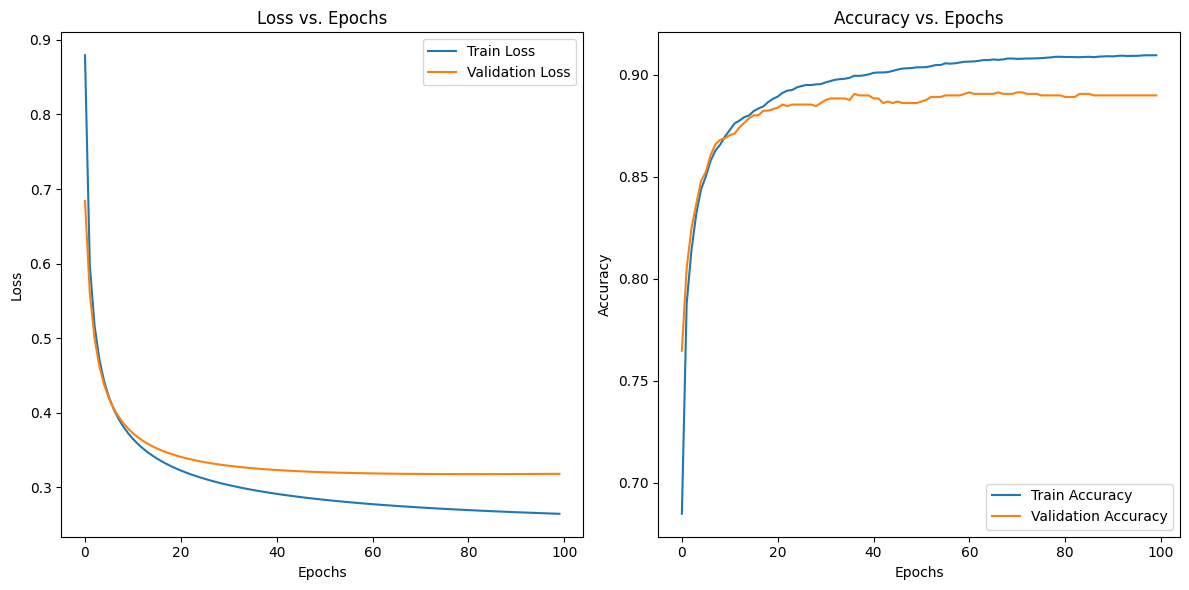

In [11]:
#75
import numpy as np
import matplotlib.pyplot as plt
# 初期設定
learning_rate = 0.01
epochs = 100
np.random.seed(42)
d = X_train.shape[1]
L = np.max(Y_train) + 1
W = np.random.randn(d, L)

# 損失と正解率を記録するリスト
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

# 学習ループ
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0

    for i in range(len(X_train)):
        x_i = X_train[i].reshape(1, -1)
        y_i = Y_train[i]
        y_i_pred = softmax(np.dot(x_i, W))

        # 損失計算
        epoch_loss += cross_entropy_loss(np.array([y_i]), y_i_pred)
        correct += (np.argmax(y_i_pred) == y_i)

        # 勾配計算と更新
        grad_W = compute_gradients(x_i, np.array([y_i]), y_i_pred)
        W -= learning_rate * grad_W

    # 学習データの損失と正解率を記録
    train_losses.append(epoch_loss / len(X_train))
    train_accuracies.append(correct / len(X_train))

    # 検証データの損失と正解率を計算
    y_valid_pred = softmax(np.dot(X_valid, W))
    valid_losses.append(cross_entropy_loss(Y_valid, y_valid_pred))
    valid_accuracies.append(accuracy(Y_valid, np.argmax(y_valid_pred, axis=1)))

    # エポック10ごとの結果表示
    if (epoch + 1) % 10 == 1:
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1] * 100:.2f}%")
        print(f"  Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1] * 100:.2f}%")

# 学習曲線をプロット
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
#76
import numpy as np

# 初期設定
learning_rate = 0.01
epochs = 100
np.random.seed(42)
d = X_train.shape[1]
L = np.max(Y_train) + 1
W = np.random.randn(d, L)

# 損失と正解率を記録するリスト
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

# チェックポイントを保存するリスト
checkpoints = []

# 学習ループ
for epoch in range(epochs):
    epoch_loss = 0
    correct = 0

    for i in range(len(X_train)):
        x_i = X_train[i].reshape(1, -1)
        y_i = Y_train[i]
        y_i_pred = softmax(np.dot(x_i, W))

        # 損失計算
        epoch_loss += cross_entropy_loss(np.array([y_i]), y_i_pred)
        correct += (np.argmax(y_i_pred) == y_i)

        # 勾配計算と更新
        grad_W = compute_gradients(x_i, np.array([y_i]), y_i_pred)
        W -= learning_rate * grad_W

    # 学習データの損失と正解率を記録
    train_losses.append(epoch_loss / len(X_train))
    train_accuracies.append(correct / len(X_train))

    # 検証データの損失と正解率を計算
    y_valid_pred = softmax(np.dot(X_valid, W))
    valid_losses.append(cross_entropy_loss(Y_valid, y_valid_pred))
    valid_accuracies.append(accuracy(Y_valid, np.argmax(y_valid_pred, axis=1)))

    # エポック10ごとの結果表示
    if (epoch + 1) % 10 == 1:
        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1] * 100:.2f}%")
        print(f"  Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1] * 100:.2f}%")

    # チェックポイントをリストに追加
    checkpoints.append({
        "epoch": epoch + 1,
        "W": W.copy(),
        "train_loss": train_losses[-1],
        "valid_loss": valid_losses[-1],
        "train_accuracy": train_accuracies[-1],
        "valid_accuracy": valid_accuracies[-1]
    })

# すべてのチェックポイントを1つのファイルに保存
np.savez("all_checkpoints.npz", checkpoints=checkpoints)


Epoch 1/100
  Train Loss: 0.8793, Train Accuracy: 68.47%
  Valid Loss: 0.6837, Valid Accuracy: 76.46%
Epoch 11/100
  Train Loss: 0.3650, Train Accuracy: 87.28%
  Valid Loss: 0.3726, Valid Accuracy: 87.03%
Epoch 21/100
  Train Loss: 0.3226, Train Accuracy: 88.92%
  Valid Loss: 0.3409, Valid Accuracy: 88.38%
Epoch 31/100
  Train Loss: 0.3031, Train Accuracy: 89.62%
  Valid Loss: 0.3290, Valid Accuracy: 88.76%
Epoch 41/100
  Train Loss: 0.2913, Train Accuracy: 90.09%
  Valid Loss: 0.3233, Valid Accuracy: 88.83%
Epoch 51/100
  Train Loss: 0.2833, Train Accuracy: 90.36%
  Valid Loss: 0.3203, Valid Accuracy: 88.68%
Epoch 61/100
  Train Loss: 0.2775, Train Accuracy: 90.64%
  Valid Loss: 0.3187, Valid Accuracy: 89.13%
Epoch 71/100
  Train Loss: 0.2730, Train Accuracy: 90.77%
  Valid Loss: 0.3180, Valid Accuracy: 89.13%
Epoch 81/100
  Train Loss: 0.2695, Train Accuracy: 90.86%
  Valid Loss: 0.3178, Valid Accuracy: 88.91%
Epoch 91/100
  Train Loss: 0.2667, Train Accuracy: 90.89%
  Valid Loss: 0.

In [13]:
#77
import numpy as np
import matplotlib.pyplot as plt
import time  # 時間計測用

# 初期設定
learning_rate = 0.01
epochs = 100
np.random.seed(42)
d = X_train.shape[1]
L = np.max(Y_train) + 1
W = np.random.randn(d, L)

# 損失と正解率を記録するリスト
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

# ミニバッチサイズを変化させるリスト
batch_sizes = [1, 2, 4, 8, 16, 32, 64]

# 結果を格納するための辞書
epoch_times = {}

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # ミニバッチ学習ループ
    start_time = time.time()  # 学習開始時間を記録
    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0

        # ミニバッチで学習
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i+batch_size]
            y_batch = Y_train[i:i+batch_size]
            y_batch_pred = softmax(np.dot(x_batch, W))

            # 損失計算
            epoch_loss += cross_entropy_loss(y_batch, y_batch_pred) * batch_size
            correct += np.sum(np.argmax(y_batch_pred, axis=1) == y_batch)

            # 勾配計算と更新
            grad_W = compute_gradients(x_batch, y_batch, y_batch_pred)
            W -= learning_rate * grad_W

        # 学習データの損失と正解率を記録
        train_losses.append(epoch_loss / len(X_train))
        train_accuracies.append(correct / len(X_train))

        # 検証データの損失と正解率を計算
        y_valid_pred = softmax(np.dot(X_valid, W))
        valid_losses.append(cross_entropy_loss(Y_valid, y_valid_pred))
        valid_accuracies.append(accuracy(Y_valid, np.argmax(y_valid_pred, axis=1)))

        # エポック10ごとの結果表示
        if (epoch + 1) % 10 == 1:
            print(f"Epoch {epoch+1}/{epochs}")
            print(f"  Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1] * 100:.2f}%")
            print(f"  Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1] * 100:.2f}%")

    # 学習時間を記録
    epoch_times[batch_size] = time.time() - start_time


Training with batch size: 1
Epoch 1/100
  Train Loss: 0.8793, Train Accuracy: 68.47%
  Valid Loss: 0.6837, Valid Accuracy: 76.46%
Epoch 11/100
  Train Loss: 0.3650, Train Accuracy: 87.28%
  Valid Loss: 0.3726, Valid Accuracy: 87.03%
Epoch 21/100
  Train Loss: 0.3226, Train Accuracy: 88.92%
  Valid Loss: 0.3409, Valid Accuracy: 88.38%
Epoch 31/100
  Train Loss: 0.3031, Train Accuracy: 89.62%
  Valid Loss: 0.3290, Valid Accuracy: 88.76%
Epoch 41/100
  Train Loss: 0.2913, Train Accuracy: 90.09%
  Valid Loss: 0.3233, Valid Accuracy: 88.83%
Epoch 51/100
  Train Loss: 0.2833, Train Accuracy: 90.36%
  Valid Loss: 0.3203, Valid Accuracy: 88.68%
Epoch 61/100
  Train Loss: 0.2775, Train Accuracy: 90.64%
  Valid Loss: 0.3187, Valid Accuracy: 89.13%
Epoch 71/100
  Train Loss: 0.2730, Train Accuracy: 90.77%
  Valid Loss: 0.3180, Valid Accuracy: 89.13%
Epoch 81/100
  Train Loss: 0.2695, Train Accuracy: 90.86%
  Valid Loss: 0.3178, Valid Accuracy: 88.91%
Epoch 91/100
  Train Loss: 0.2667, Train Accu


Training with batch size: 1
Epoch 1/100
  Train Loss: 1.1222, Train Accuracy: 66.76%
  Valid Loss: 1.0404, Valid Accuracy: 74.96%
Epoch 11/100
  Train Loss: 0.9097, Train Accuracy: 87.33%
  Valid Loss: 0.9065, Valid Accuracy: 87.48%
Epoch 21/100
  Train Loss: 0.8913, Train Accuracy: 88.86%
  Valid Loss: 0.8923, Valid Accuracy: 88.46%
Epoch 31/100
  Train Loss: 0.8831, Train Accuracy: 89.66%
  Valid Loss: 0.8870, Valid Accuracy: 88.98%
Epoch 41/100
  Train Loss: 0.8781, Train Accuracy: 89.99%
  Valid Loss: 0.8843, Valid Accuracy: 89.06%
Epoch 51/100
  Train Loss: 0.8747, Train Accuracy: 90.35%
  Valid Loss: 0.8826, Valid Accuracy: 89.13%
Epoch 61/100
  Train Loss: 0.8722, Train Accuracy: 90.43%
  Valid Loss: 0.8815, Valid Accuracy: 89.06%
Epoch 71/100
  Train Loss: 0.8702, Train Accuracy: 90.55%
  Valid Loss: 0.8806, Valid Accuracy: 89.06%
Epoch 81/100
  Train Loss: 0.8686, Train Accuracy: 90.76%
  Valid Loss: 0.8799, Valid Accuracy: 88.98%
Epoch 91/100
  Train Loss: 0.8673, Train Accu

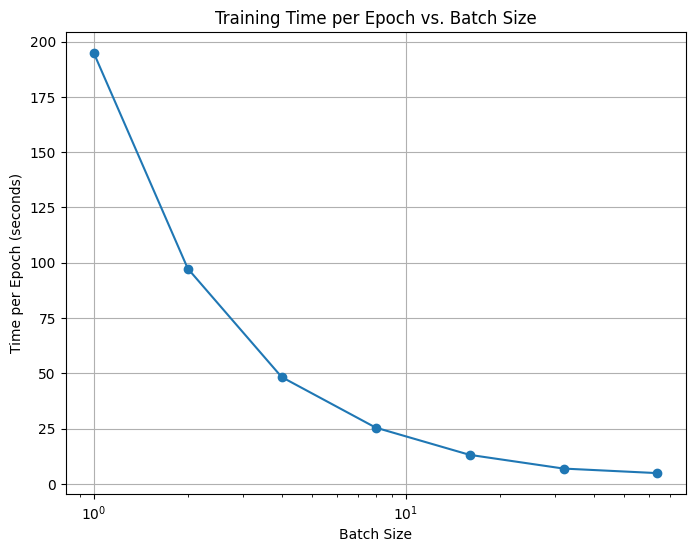

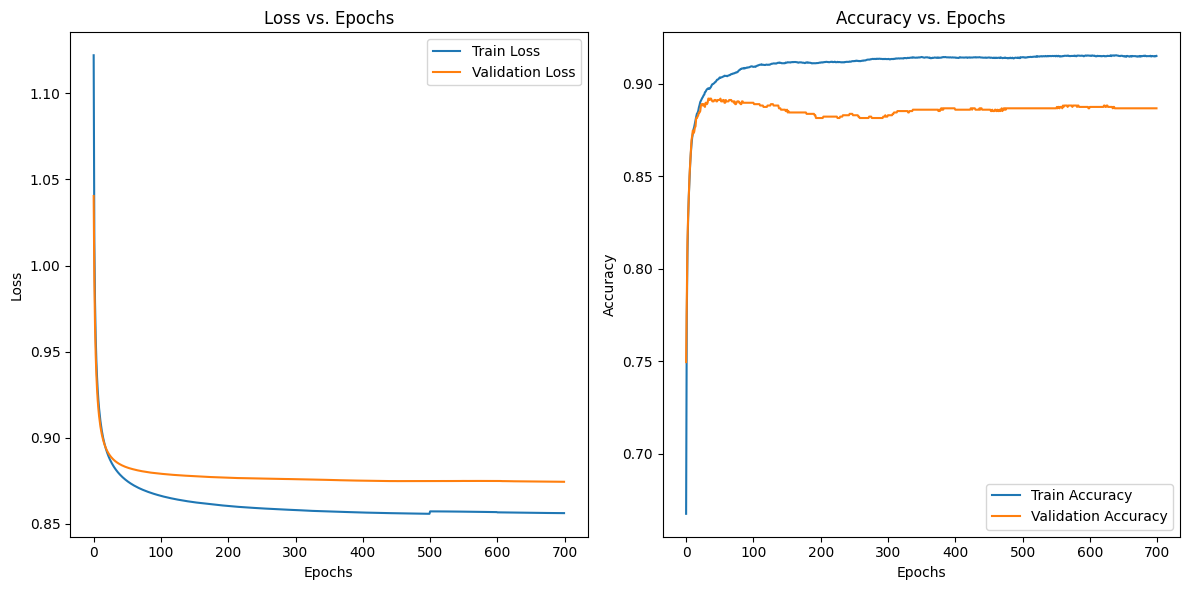

In [ ]:
#78
import numpy as np
import time  # 時間計測用

# 初期設定
learning_rate = 0.01
epochs = 100
np.random.seed(42)
d = X_train.shape[1]
L = np.max(Y_train) + 1
W = np.random.randn(d, L)

# ミニバッチサイズを変化させるリスト
batch_sizes = [1, 2, 4, 8, 16, 32, 64]

# 結果を格納するための辞書
epoch_times = {}

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # 学習ループごとに重みを初期化（公平性を保つため）
    W = np.random.randn(d, L)

    # ミニバッチ学習ループ
    start_time = time.time()  # 学習開始時間を記録
    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0

        # ミニバッチで学習
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i+batch_size]
            y_batch = Y_train[i:i+batch_size]
            y_batch_pred = softmax(np.dot(x_batch, W))

            # 損失計算
            epoch_loss += cross_entropy_loss(y_batch, y_batch_pred) * batch_size
            correct += np.sum(np.argmax(y_batch_pred, axis=1) == y_batch)

            # 勾配計算と更新
            grad_W = compute_gradients(x_batch, y_batch, y_batch_pred)
            W -= learning_rate * grad_W

    # 学習時間を記録
    epoch_times[batch_size] = time.time() - start_time

# 学習時間の出力
print("\nBatch size vs Time per epoch:")
for batch_size, time_taken in epoch_times.items():
    print(f"Batch size: {batch_size}, Time per epoch: {time_taken:.4f} seconds")



In [ ]:
#79
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

# 初期設定
learning_rate = 0.01
epochs = 100
np.random.seed(42)

# デバイスの設定（GPUが利用可能ならGPUを使用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# データの準備（X_train, Y_train, X_valid, Y_valid は事前にロードされているものとします）
# NumPy配列からTorchテンソルに変換
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long).to(device)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)
Y_valid_tensor = torch.tensor(Y_valid, dtype=torch.long).to(device)

# ニューラルネットワークの定義（2層または3層のネットワーク）
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        # 層の定義
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # 入力層 -> 隠れ層
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # 隠れ層 -> 隠れ層
        self.fc3 = nn.Linear(hidden_dim, output_dim)  # 隠れ層 -> 出力層
        self.relu = nn.ReLU()  # ReLU活性化関数

    def forward(self, x):
        x = self.relu(self.fc1(x))  # 入力 -> 隠れ層1
        x = self.relu(self.fc2(x))  # 隠れ層1 -> 隠れ層2
        x = self.fc3(x)  # 隠れ層2 -> 出力層
        return x

# 入力次元、隠れ層次元、出力次元の設定
input_dim = X_train_tensor.shape[1]
hidden_dim = 128  # 隠れ層の次元数
output_dim = torch.max(Y_train_tensor) + 1  # 出力次元（クラス数）

# モデルのインスタンス化
model = NeuralNetwork(input_dim, hidden_dim, output_dim).to(device)

# 損失関数と最適化手法の設定
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 損失と精度を記録するリスト
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

# ミニバッチサイズを変化させるリスト
batch_sizes = [1, 2, 4, 8, 16, 32, 64]

# 結果を格納するための辞書
epoch_times = {}

# 学習ループ
for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # ミニバッチ学習ループ
    start_time = time.time()  # 学習開始時間を記録
    for epoch in range(epochs):
        model.train()  # 訓練モードに設定
        epoch_loss = 0
        correct = 0

        # ミニバッチで学習
        for i in range(0, len(X_train_tensor), batch_size):
            x_batch = X_train_tensor[i:i+batch_size]
            y_batch = Y_train_tensor[i:i+batch_size]

            # 順伝播
            y_pred = model(x_batch)

            # 損失計算
            loss = criterion(y_pred, y_batch)
            epoch_loss += loss.item() * batch_size

            # 勾配の初期化と逆伝播
            optimizer.zero_grad()
            loss.backward()

            # パラメータ更新
            optimizer.step()

            # 正解率計算
            correct += torch.sum(torch.argmax(y_pred, dim=1) == y_batch)

        # 学習データの損失と正解率を記録
        train_losses.append(epoch_loss / len(X_train_tensor))
        train_accuracies.append(correct.item() / len(X_train_tensor))

        # 検証データの損失と正解率を計算
        model.eval()  # 評価モードに設定
        with torch.no_grad():
            y_valid_pred = model(X_valid_tensor)
            valid_loss = criterion(y_valid_pred, Y_valid_tensor)
            valid_losses.append(valid_loss.item())
            valid_accuracies.append((Y_valid_tensor == torch.argmax(y_valid_pred, dim=1)).float().mean().item())

        # エポック10ごとの結果表示
        if (epoch + 1) % 10 == 1:
            print(f"Epoch {epoch+1}/{epochs}")
            print(f"  Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1] * 100:.2f}%")
            print(f"  Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1] * 100:.2f}%")

    # 学習時間を記録
    epoch_times[batch_size] = time.time() - start_time



Training with batch size: 1
Epoch 1/100
  Train Loss: 0.6170, Train Accuracy: 76.94%
  Valid Loss: 0.4114, Valid Accuracy: 85.16%
Epoch 11/100
  Train Loss: 0.1742, Train Accuracy: 94.25%
  Valid Loss: 0.3486, Valid Accuracy: 88.68%
Epoch 21/100
  Train Loss: 0.0564, Train Accuracy: 97.99%
  Valid Loss: 0.5718, Valid Accuracy: 87.86%
Epoch 31/100
  Train Loss: 0.0351, Train Accuracy: 98.77%
  Valid Loss: 0.7304, Valid Accuracy: 88.53%
Epoch 41/100
  Train Loss: 0.0161, Train Accuracy: 99.49%
  Valid Loss: 0.7888, Valid Accuracy: 87.93%
Epoch 51/100
  Train Loss: 0.0136, Train Accuracy: 99.57%
  Valid Loss: 0.8649, Valid Accuracy: 88.61%
Epoch 61/100
  Train Loss: 0.0089, Train Accuracy: 99.72%
  Valid Loss: 0.9238, Valid Accuracy: 88.16%
Epoch 71/100
  Train Loss: 0.0069, Train Accuracy: 99.76%
  Valid Loss: 0.8278, Valid Accuracy: 88.31%
Epoch 81/100
  Train Loss: 0.0053, Train Accuracy: 99.76%
  Valid Loss: 0.7602, Valid Accuracy: 89.06%
Epoch 91/100
  Train Loss: 0.0045, Train Accu